In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

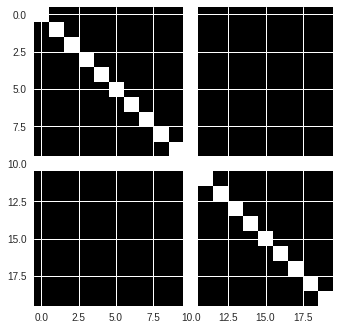

In [2]:
# 画像を作る
img = np.zeros( (20,20), dtype=np.float32 )


img[10,:] = 1
img[:,10] = 1
for i in range(20):
  img[i,i] = 1
  img[19-i, 19-i] = 1
  
  plt.imshow(img, cmap="gray")

In [0]:
# 画像を(データ数， 縦, 横，　チャンネル数)に変換
x = tf.Variable( img.reshape(1,20,20,1) )

# フィルタ
W = tf.Variable(
[[0, 1, 0],
 [0, 1, 0],
 [0, 1, 0]], dtype=tf.float32)

# フィルタを（縦， 横, チャンネル数, フィルタ数）に変換
W = tf.reshape(W, [3, 3, 1, 1]  )

# 畳み込み
画像を縮小して特徴を取り出す

In [0]:
# 縦と横に2ピクセル飛ばしで畳み込み
conv = tf.nn.conv2d( x, W, strides=[1,2,2,1], padding="VALID" ) 

9 9


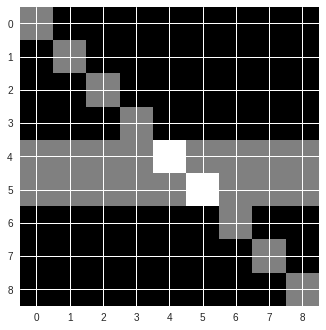

In [5]:
with tf.Session() as sess:
  sess.run( tf.global_variables_initializer() )
  conv_img = sess.run( conv )

  h = conv_img.shape[1]
  w = conv_img.shape[2]
  
  print(h, w)
  plt.imshow( conv_img.reshape(h, w), cmap="gray" )

# 転置畳み込み
入力を大きくする

In [0]:
# 縦と横を2倍に拡大して転置畳み込み
conv_t = tf.nn.conv2d_transpose( x, W, strides=[1,2,2,1],  output_shape=(1,40,40,1))

40 40


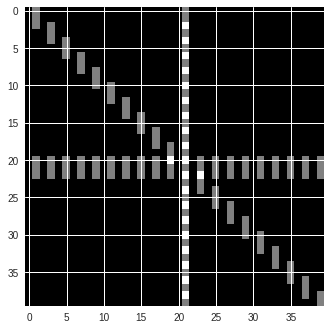

In [7]:
with tf.Session() as sess:
  sess.run( tf.global_variables_initializer() )
  conv_t_img = sess.run( conv_t )

  h = conv_t_img.shape[1]
  w = conv_t_img.shape[2]
  
  print(h, w)
  plt.imshow( conv_t_img.reshape(h, w), cmap="gray" )